Hyperparameter tuning is the process of selecting optimal hyperparameter values to maximize a model’s performance on validation data.


Hyperparameters are parameters that are set before the training process begins.
They control how a model learns, not what it learns.

Examples
Model:Hyperparameters

Linear Regression:learning rate

Decision Tree:max_depth, min_samples_split

## Things to learn
Introduction to svm

Soft margin and hard margin

svm math intuition

cost function

support vector regression

svm kernel

svm kernel implementation

support vector classifications

### SVM(Support Vector Machine):

SVM finds the best boundary(Hyperplane) that separates data into different groups while keeping the boundary as far as possible from each group.used for both classification and regression


Support vectors are the data points that lie closest to the decision boundary.

Margin is the maximum distance from hyperplane to nearest data point


Hard margin SVM assumes that the data is perfectly separable,there are no datapoints between hyperplane and postive margin

Soft margin SVM allows some data points to violate the margin or even be misclassified.


## Math intuition:

In Support Vector Machine, the decision boundary (hyperplane) is written as:ax+by+c=0

In vector form, this becomes:w^Tx+b=0

w is the weight vector
b is the bias
x is a data point

cost function is a mathematical function that measures how wrong a model’s predictions

distance between points and margin is 2 / ||w||
cost function=||w||^2/2

as distance increases the cost function decreases


## A kernel allows SVM to separate non-linear data by implicitly transforming it into a higher-dimensional space.

Map data from low dimension → higher dimension

Data becomes linearly separable there

Perform linear separation in that space

Map the result back to original space

This is called the kernel trick.

### types:

Polynomial
RBF(Gaussian)
Sigmoid
Linear

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification


In [38]:
x,y=make_classification(n_samples=1000,n_features=2,n_classes=2,n_clusters_per_class=2,n_redundant=0)


In [39]:
x

array([[-0.45258015, -1.12742726],
       [ 2.81321367, -2.14257998],
       [-1.72697254, -0.36332371],
       ...,
       [ 0.49841205, -0.89589202],
       [ 0.04482685, -1.57542622],
       [-1.0370898 , -1.20901163]], shape=(1000, 2))

In [40]:
y

array([0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,

In [41]:
pd.DataFrame(x)[0]

0     -0.452580
1      2.813214
2     -1.726973
3      1.896395
4     -0.672589
         ...   
995   -0.611576
996   -0.361538
997    0.498412
998    0.044827
999   -1.037090
Name: 0, Length: 1000, dtype: float64

<Axes: xlabel='0', ylabel='1'>

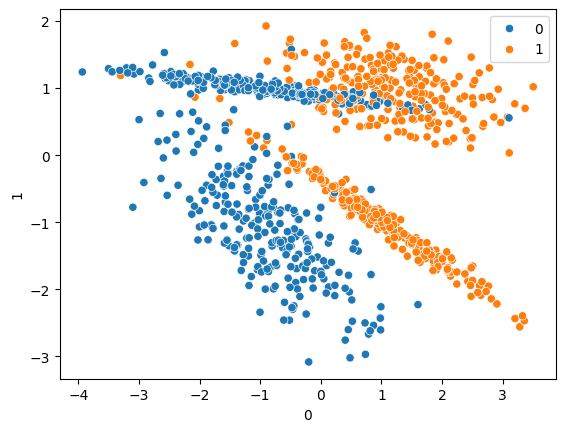

In [42]:

sns.scatterplot(x=pd.DataFrame(x)[0],y=pd.DataFrame(x)[1],hue=y)

In [43]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=10)

In [44]:
from sklearn.svm import SVC

svc=SVC(kernel='linear')

svc.fit(x_train,y_train)
svc.coef_

y_pred=svc.predict(x_test)

In [45]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
print("Confusion matrix:",confusion_matrix(y_pred,y_test))
print("classification_report:",classification_report(y_pred,y_test))
print("Accuracy score:",accuracy_score(y_pred,y_test))

Confusion matrix: [[111  16]
 [ 12 111]]
classification_report:               precision    recall  f1-score   support

           0       0.90      0.87      0.89       127
           1       0.87      0.90      0.89       123

    accuracy                           0.89       250
   macro avg       0.89      0.89      0.89       250
weighted avg       0.89      0.89      0.89       250

Accuracy score: 0.888


In [50]:
rbf=SVC(kernel='rbf')
rbf.fit(x_train,y_train)

y_pred1=rbf.predict(x_test)

print("Confusion matrix:",confusion_matrix(y_pred1,y_test))
print("classification_report:",classification_report(y_pred1,y_test))
print("Accuracy score:",accuracy_score(y_pred1,y_test))



Confusion matrix: [[114  11]
 [  9 116]]
classification_report:               precision    recall  f1-score   support

           0       0.93      0.91      0.92       125
           1       0.91      0.93      0.92       125

    accuracy                           0.92       250
   macro avg       0.92      0.92      0.92       250
weighted avg       0.92      0.92      0.92       250

Accuracy score: 0.92


In [48]:
poly=SVC(kernel='poly')
poly.fit(x_train,y_train)
poly_pred=poly.predict(x_test)
print("Confusion matrix:",confusion_matrix(poly_pred,y_test))
print("classification_report:",classification_report(poly_pred,y_test))
print("Accuracy score:",accuracy_score(poly_pred,y_test))

Confusion matrix: [[109  21]
 [ 14 106]]
classification_report:               precision    recall  f1-score   support

           0       0.89      0.84      0.86       130
           1       0.83      0.88      0.86       120

    accuracy                           0.86       250
   macro avg       0.86      0.86      0.86       250
weighted avg       0.86      0.86      0.86       250

Accuracy score: 0.86


In [49]:
sig=SVC(kernel='sigmoid')
sig.fit(x_train,y_train)
sig_pred=poly.predict(x_test)
print("Confusion matrix:",confusion_matrix(sig_pred,y_test))
print("classification_report:",classification_report(sig_pred,y_test))
print("Accuracy score:",accuracy_score(sig_pred,y_test))

Confusion matrix: [[109  21]
 [ 14 106]]
classification_report:               precision    recall  f1-score   support

           0       0.89      0.84      0.86       130
           1       0.83      0.88      0.86       120

    accuracy                           0.86       250
   macro avg       0.86      0.86      0.86       250
weighted avg       0.86      0.86      0.86       250

Accuracy score: 0.86


In [ ]:
## Hyperparameter Tuning with SVC

from sklearn.model_selection import GridSearchCV

# Defining param range

param_grid={ 'C':[0.1,1,10,100,1000],
            'gamma':[1,0.1,0.01,0.001,0.0001],
            'kernel':['rbf']
            }
grid=GridSearchCV(SVC(),param_grid=param_grid,refit=True,cv=5,verbose=3)
# it checks all combos of given param using cv and selects the midel with best performance
grid.fit(x_train,y_train)

grid.best_params_
y_pred4=grid.predict(x_test)
print("accuracy_score:",accuracy_score(y_pred4,y_test))

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.907 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.907 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.907 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.873 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.907 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.880 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.893 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.920 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.840 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.893 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.853 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

In [55]:
print("classification_report:",classification_report(y_pred4,y_test))
print("accuracy_score:",accuracy_score(y_pred4,y_test))

classification_report:               precision    recall  f1-score   support

           0       0.96      0.94      0.95       126
           1       0.94      0.96      0.95       124

    accuracy                           0.95       250
   macro avg       0.95      0.95      0.95       250
weighted avg       0.95      0.95      0.95       250

accuracy_score: 0.948
